# **Prepare datasets**

# **Prepare train & test datasets/Splitting Dataset**

Split dataset menjadi 80% untuk train dan 20% untuk test.

In [ ]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from gensim.models import Word2Vec

In [ ]:
conn = sqlite3.connect('challenge_database.db')
#read stopword_table
df = pd.read_sql_query("""
                SELECT
                    *
                FROM data_table
              """, conn)
conn.close()

In [ ]:
df

,text,label,text_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung dimiliki pengusaha pabrik tahu puluhan ...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus k212 mmbri hujjah partai apa...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatera bandung tempat...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia diri unboxing paket barang bagu...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kasih k...
...,...,...,...
10928,f - demokrat dorong upaya kemandirian energi n...,neutral,f demokrat dorong upaya kemandirian energi nas...
10929,tidak bosan,positive,bosan
10930,enak rasa masakan nya apalagi kepiting yang me...,positive,enak rasa masakan kepiting menyenangkan memili...
10931,"pagi pagi di tol pasteur sudah macet parah , b...",negative,pagi pagi tol pasteur macet parah bikin jengkel


In [ ]:
# data_preprocessed = df.text_clean.tolist()
data_preprocessed = df['text_clean'].tolist()

In [ ]:
print(df.columns)

Index(['text', 'label', 'text_clean'], dtype='object')


In [ ]:
# Tokenisasi dan pembuatan vektor kata
with open("fe_nn.p", "rb") as file:
    count_vect = pickle.load(file)

with open('X_train_counts.pkl', 'rb') as file:
    X_train = pickle.load(file)

with open('X_test_counts.pkl', 'rb') as file:
    X_test = pickle.load(file)

with open('y_train.pkl', 'rb') as file:
    y_train = pickle.load(file)

with open('y_test.pkl', 'rb') as file:
    y_test = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.5.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
count_vect.fit(data_preprocessed)

X = count_vect.transform(data_preprocessed)

y = df.label

In [ ]:
y

0        positive
1         neutral
2        positive
3        positive
4        negative
           ...   
10928     neutral
10929    positive
10930    positive
10931    negative
10932    positive
Name: label, Length: 10933, dtype: object

In [ ]:
# Encoding label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y, num_classes=3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)

Training data shape:  (8746, 17117)
Testing data shape:  (2187, 17117)


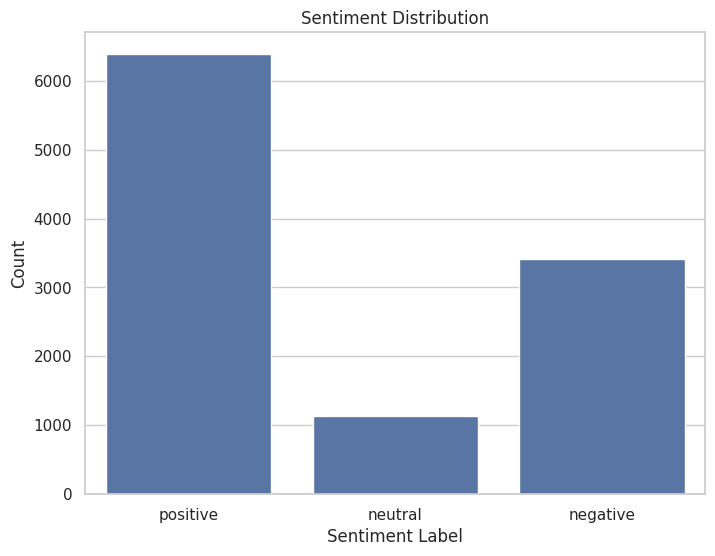

label
positive    6383
negative    3412
neutral     1138
Name: count, dtype: int64

In [ ]:
# Menampilkan distribusi sentimen
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()
df.label.value_counts()

In [ ]:
# Memisahkan data berdasarkan label
neg = df.loc[df['label'] == 'negative'].text_clean.tolist()
neu = df.loc[df['label'] == 'neutral'].text_clean.tolist()
pos = df.loc[df['label'] == 'positive'].text_clean.tolist()

# Membuat label berdasarkan kategori
neg_label = df.loc[df['label'] == 'negative'].label.tolist()
neu_label = df.loc[df['label'] == 'neutral'].label.tolist()
pos_label = df.loc[df['label'] == 'positive'].label.tolist()

# Menggabungkan semua data dan label
total_data = pos + neu + neg
labels = pos_label + neu_label + neg_label

print("Pos: %s, Neu: %s, Neg: %s" % (len(pos), len(neu), len(neg)))
print("Total data: %s" % len(total_data))


Pos: 6383, Neu: 1138, Neg: 3412
Total data: 10933


# Prepare Train and Test Dataset (Neural Network)

Jalankan training dengan metode Neural Network. "MLPClassifier" merupakan salah satu modul dari "Neural Network" pada library Sklearn.

In [ ]:
# Latih model menggunakan MLPClassifier
model = MLPClassifier(
    alpha=1e-5,
    hidden_layer_sizes=(128,128),
    solver='adam',
    random_state=42,
    max_iter=20,
    activation='relu',
    verbose=True,
    batch_size = 16
)

model.fit(X_train, y_train)

Iteration 1, loss = 0.83354148
Iteration 2, loss = 0.30730874
Iteration 3, loss = 0.12961413
Iteration 4, loss = 0.07538367
Iteration 5, loss = 0.05255511
Iteration 6, loss = 0.04324658
Iteration 7, loss = 0.03962684
Iteration 8, loss = 0.03546580
Iteration 9, loss = 0.05193868
Iteration 10, loss = 0.03845679
Iteration 11, loss = 0.03261885
Iteration 12, loss = 0.02917309
Iteration 13, loss = 0.02841140
Iteration 14, loss = 0.02779695
Iteration 15, loss = 0.02685966
Iteration 16, loss = 0.02666523
Iteration 17, loss = 0.02687184
Iteration 18, loss = 0.02637339
Iteration 19, loss = 0.02665309
Iteration 20, loss = 0.05159828


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, batch_size=16, hidden_layer_sizes=(128, 128),
              max_iter=20, random_state=42, verbose=True)

In [ ]:
with open("model.p", "wb") as model_file:
    pickle.dump(model, model_file)

# **Evaluation**

Langkah selanjutnya adalah "Evaluation". Module "classification_report" dari Sklearn merupakan salah satu modul untuk melakukan "Evaluation". Pada tahap evaluasi ini kita akan menerapkan metode evaluasi Accuracy, Precision, Recall dan F1-Score.

In [ ]:
# Evaluasi model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

accuracy = accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))


Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75       677
           1       0.81      0.59      0.69       234
           2       0.88      0.90      0.89      1276

    accuracy                           0.83      2187
   macro avg       0.81      0.75      0.78      2187
weighted avg       0.83      0.83      0.82      2187



Confusion Matrix:
[[ 522   21  134]
 [  66  139   29]
 [ 118   11 1147]]


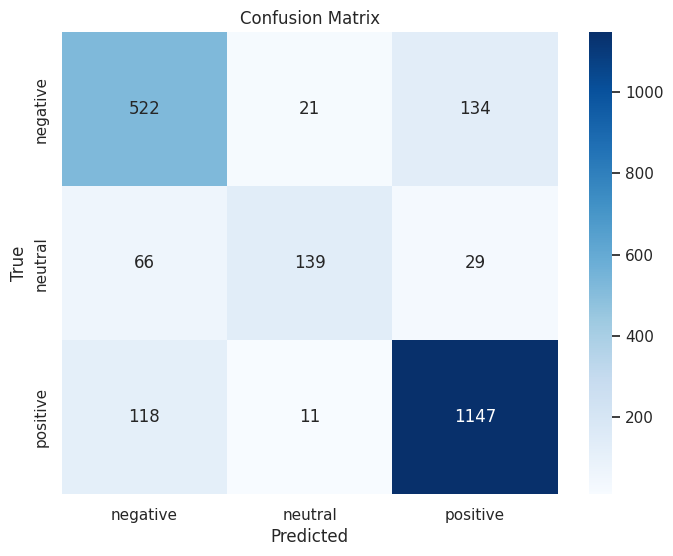

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Menggunakan model untuk memprediksi hasil dari data uji
predictions = model.predict(X_test)

# Mengonversi hasil prediksi dari one-hot encoding ke format label
Y_test_labels = np.argmax(y_test, axis=1)
predictions_labels = np.argmax(predictions, axis=1)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(Y_test_labels, predictions_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Visualisasi confusion matrix menggunakan seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

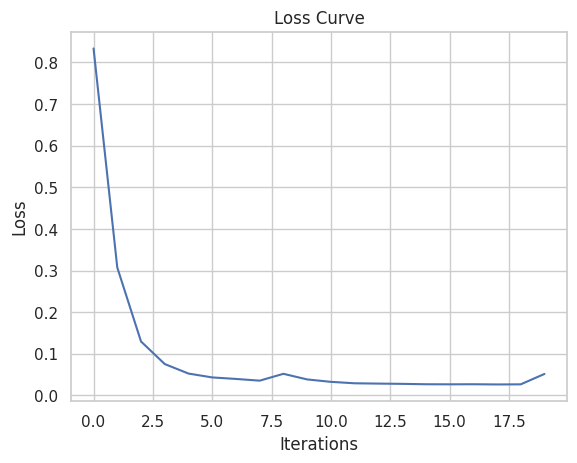

In [ ]:
plt.plot(model.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## **Cross Validation**

Mekanisme evaluasi selanjutnya menggunakan "Cross Validation", yaitu merotasi porsi testing dari dataset agar bisa melihat model yang sudah kita buat stabil ketika dihadapkan pada data yang berbeda.

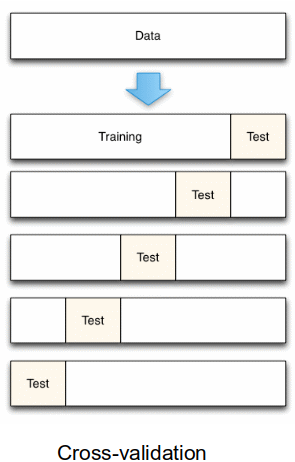

In [ ]:
# Untuk lebih menyakinkan lagi, kita juga bisa melakukan "Cross Validation"
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

for iteration, data in enumerate(kf.split(X), start=1):

    data_train = X[data[0]]
    target_train = y[data[0]]
    data_test = X[data[1]]
    target_test = y[data[1]]

    clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(100,), solver='adam', random_state=42, activation='relu')
    clf.fit(data_train,target_train)

    preds = clf.predict(data_test)

    # for the current fold only
    accuracy = accuracy_score(target_test,preds)

    print("Training ke-", iteration)
    print(classification_report(target_test,preds))
    print("======================================================")

    accuracies.append(accuracy)

# this is the average accuracy over all folds
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

Training ke- 1
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       690
           1       0.81      0.63      0.71       220
           2       0.86      0.88      0.87      1277

   micro avg       0.82      0.80      0.81      2187
   macro avg       0.81      0.74      0.77      2187
weighted avg       0.82      0.80      0.81      2187
 samples avg       0.80      0.80      0.80      2187



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training ke- 2
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       667
           1       0.75      0.60      0.67       219
           2       0.88      0.87      0.87      1301

   micro avg       0.82      0.80      0.81      2187
   macro avg       0.79      0.73      0.76      2187
weighted avg       0.82      0.80      0.81      2187
 samples avg       0.79      0.80      0.79      2187



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training ke- 3
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       695
           1       0.80      0.62      0.70       213
           2       0.86      0.87      0.86      1279

   micro avg       0.82      0.80      0.81      2187
   macro avg       0.80      0.74      0.77      2187
weighted avg       0.82      0.80      0.81      2187
 samples avg       0.79      0.80      0.79      2187



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training ke- 4
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       705
           1       0.82      0.59      0.68       234
           2       0.86      0.86      0.86      1247

   micro avg       0.80      0.78      0.79      2186
   macro avg       0.79      0.72      0.75      2186
weighted avg       0.80      0.78      0.79      2186
 samples avg       0.77      0.78      0.78      2186



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training ke- 5
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       655
           1       0.80      0.56      0.66       252
           2       0.85      0.87      0.86      1279

   micro avg       0.80      0.78      0.79      2186
   macro avg       0.79      0.70      0.74      2186
weighted avg       0.80      0.78      0.79      2186
 samples avg       0.77      0.78      0.77      2186




Rata-rata Accuracy:  0.775905448104515


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hasilnya nilai rata-rata accuracy pada angka 0.8. Ini menunjukkan model kita cukup stabil pada angka 0.8.

# Predict

:*Asumsi* kita sudah oke dengan model yang dibikin, selanjutnya melakukan predict pada model untuk mengetes jika model sudah jalan.

In [ ]:
import re
import pickle

def cleansing(text):
    # Example of basic text cleaning, you can modify as needed
    text = re.sub(r'\W', ' ', text)
    text = text.lower().strip()
    return text

# Load the model and count vectorizer
model = pickle.load(open('/content/model.p', 'rb'))

# Example text for prediction
original_text = 'restoran yang berkonsep terbuka ini membuat udara lembang sangat terasa sejuk nya .'

# Feature Extraction
text = count_vect.transform([cleansing(original_text)])

# Predict sentiment
result = model.predict(text)[0]

# Convert the one-hot encoded result to label
predicted_label_index = np.argmax(result)
predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]

print(f"Text: {original_text}")
print(f"Predicted Sentiment: {predicted_label}")


Text: restoran yang berkonsep terbuka ini membuat udara lembang sangat terasa sejuk nya .
Predicted Sentiment: positive


In [ ]:
import re
import pickle

def cleansing(text):
    # Example of basic text cleaning, you can modify as needed
    text = re.sub(r'\W', ' ', text)
    text = text.lower().strip()
    return text

# Load the model and count vectorizer
model = pickle.load(open('/content/model.p', 'rb'))

# Example text for prediction
original_text = 'simcard indosat inaktiv gara-gara lupa isi pulsa dan kabar nya aktif jika pinda ke pasca bayar , ribet banget'

# Feature Extraction
text = count_vect.transform([cleansing(original_text)])

# Predict sentiment
result = model.predict(text)[0]

# Convert the one-hot encoded result to label
predicted_label_index = np.argmax(result)
predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]

print(f"Text: {original_text}")
print(f"Predicted Sentiment: {predicted_label}")


Text: simcard indosat inaktiv gara-gara lupa isi pulsa dan kabar nya aktif jika pinda ke pasca bayar , ribet banget
Predicted Sentiment: negative


In [ ]:
import re
import pickle

def cleansing(text):
    # Example of basic text cleaning, you can modify as needed
    text = re.sub(r'\W', ' ', text)
    text = text.lower().strip()
    return text

# Load the model and count vectorizer
model = pickle.load(open('/content/model.p', 'rb'))

# Example text for prediction
original_text = 'perkeretaapian kemhub , dirut ap2 , dirut pt kami , dan dirut railink'

# Feature Extraction
text = count_vect.transform([cleansing(original_text)])

# Predict sentiment
result = model.predict(text)[0]

# Convert the one-hot encoded result to label
predicted_label_index = np.argmax(result)
predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]

print(f"Text: {original_text}")
print(f"Predicted Sentiment: {predicted_label}")


Text: perkeretaapian kemhub , dirut ap2 , dirut pt kami , dan dirut railink
Predicted Sentiment: neutral
